# Cancer Type Prediction Tutorial

Welcome to this step-by-step tutorial on building a machine learning model to predict cancer types using RNA sequencing data. In this notebook, we will go through the following stages:

1. **Data Loading & Preprocessing**
2. **Exploratory Data Analysis (EDA)**
3. **Model Training**
4. **Evaluation**
5. **Conclusion & Next Steps**

This tutorial is beginner-friendly and aims to demonstrate a basic ML pipeline in Python using popular libraries like `pandas`, `scikit-learn`, and `matplotlib`.

---

> **Note**: Make sure you've installed the necessary libraries. You can install them using:

```bash
pip install pandas scikit-learn matplotlib seaborn
```


## Data Download

In [1]:
from google.colab import files
import zipfile

uploaded = files.upload()
for fn in uploaded:
    if fn.endswith(".zip"):
        with zipfile.ZipFile(fn, 'r') as zip_ref:
            zip_ref.extractall("unzipped_data")
            print(f"Extracted to ./unzipped_data")
    else:
        print("File uploaded:", fn)


Saving archive_kaggle_cancer.zip to archive_kaggle_cancer.zip
Extracted to ./unzipped_data


### Load and Preprocess the data

In [20]:
import pandas as pd

file_path = "unzipped_data/PanCanAtlas_9126RNASeqSamplesWithImmuneSubtypes_440Genes_SampleIdsOrdered_SampleIdWithSubtypes_RR020718_RownamesGenesWithSignature.csv"

def preprocess_expression_data(filepath):
    data = pd.read_csv(filepath)
    data.rename(columns={"Unnamed: 0": "Sample"}, inplace=True)
    df = data.set_index("Sample").transpose()
    df["Cancer_Type"] = df.index.to_series().apply(lambda x: x.split('.')[-2])
    return df

df = preprocess_expression_data(file_path)
df.head()


Sample,ACTL6A_S5,ADAM9_S2,ADAMTS1_S5,ADCY7_S3,AIMP2_S5,ALKBH7_S5,ALOX5AP_S3,AMPD3_S3,APITD1_S5,APOC1_S3,...,WDHD1_S5,WDR54_S5,WDR77_S5,WIPF1_S3,WNT2B_S2,WNT8B_S2,WSB2_S5,ZWILCH_S5,ZYX_S2,Cancer_Type
TCGA.02.0047.GBM.C4,745.567,4287.78,241.556,1067.640,406.736,518.148,1326.410,326.992,184.308,1370.66,...,107.5630,321.460,925.044,2154.950,43.0253,0.0000,4291.47,260.211,3867.97,GBM
TCGA.02.0055.GBM.C4,1154.310,9475.54,6098.950,556.132,537.088,942.957,4211.350,361.598,319.535,3093.48,...,162.5790,585.844,931.184,1947.580,44.8493,0.0000,2494.18,467.560,11481.40,GBM
TCGA.02.2483.GBM.C4,1498.680,2307.12,433.984,497.309,752.148,656.042,566.543,196.728,311.443,3504.38,...,267.2300,561.055,1370.770,1042.740,10.1319,0.8443,4128.76,682.242,5066.81,GBM
TCGA.02.2485.GBM.C4,1320.000,2685.71,911.905,316.667,785.552,953.809,307.143,80.000,260.462,2482.86,...,309.5240,422.381,811.905,849.524,18.5714,0.9524,3609.52,440.386,5090.95,GBM
TCGA.02.2486.GBM.C4,1404.270,2843.90,321.951,637.805,792.963,815.244,5671.950,542.683,494.488,12512.80,...,45.7317,669.512,954.878,2454.880,7.3171,0.6098,2747.56,166.689,7800.00,GBM


## Exploratory Data Analysis

In [21]:
# Check how many samples per cancer type
df["Cancer_Type"].value_counts()

,count
Cancer_Type,
BRCA,1083
UCEC,528
KIRC,515
HNSC,514
LGG,514
THCA,500
LUSC,486
LUAD,457
COAD,441


### Group Cancer Types into Broad Categories


In [22]:
# Map specific cancer types to broader classes
cancer_type_mapping = {
    "BRCA": "Breast Cancer",
    "UCEC": "Gynecological", "CESC": "Gynecological", "OV": "Gynecological", "UCS": "Gynecological",
    "COAD": "Gastrointestinal", "STAD": "Gastrointestinal", "READ": "Gastrointestinal",
    "LIHC": "Gastrointestinal", "PAAD": "Gastrointestinal", "CHOL": "Gastrointestinal", "ESCA": "Gastrointestinal",
    "PRAD": "Genitourinary", "KIRC": "Genitourinary", "KIRP": "Genitourinary", "TGCT": "Genitourinary",
    "BLCA": "Genitourinary", "KICH": "Genitourinary",
    "LUSC": "Lung Cancer", "LUAD": "Lung Cancer",
    "HNSC": "Brain and Head Cancer", "LGG": "Brain and Head Cancer", "GBM": "Brain and Head Cancer",
    "THCA": "Other", "ACC": "Other", "PCPG": "Other", "SKCM": "Other", "UVM": "Other", "MESO": "Other", "SARC": "Other",
}

df["Cancer_Group"] = df["Cancer_Type"].map(cancer_type_mapping)


### Plot Distribution of Original Cancer Types

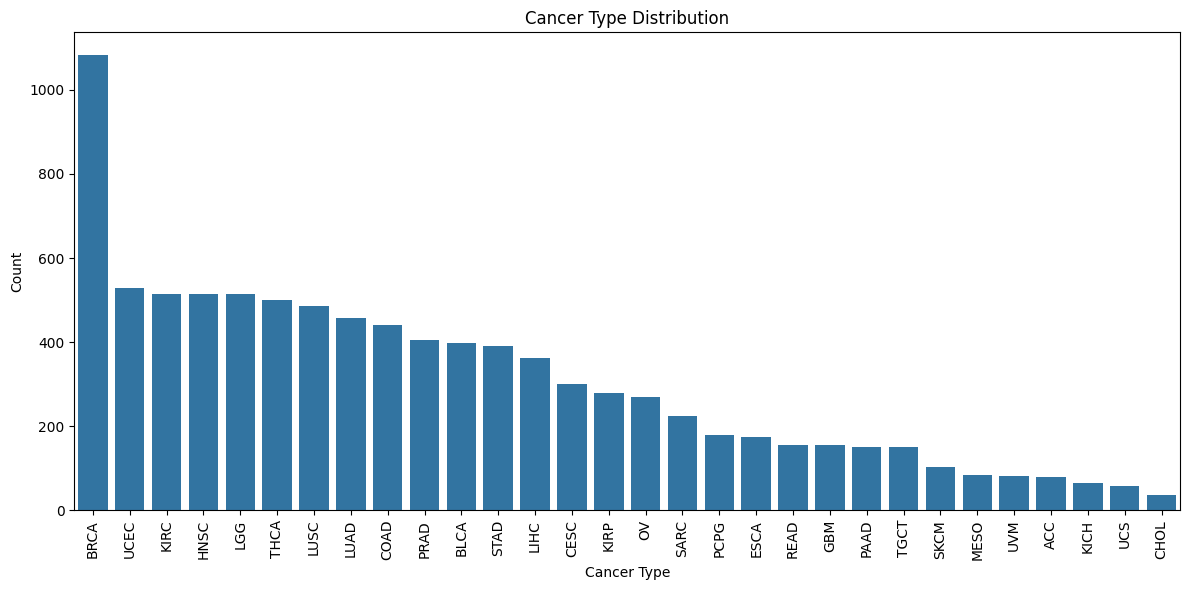

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df["Cancer_Type"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks(rotation=90)
plt.title("Cancer Type Distribution")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Plot Distribution of Cancer Groups

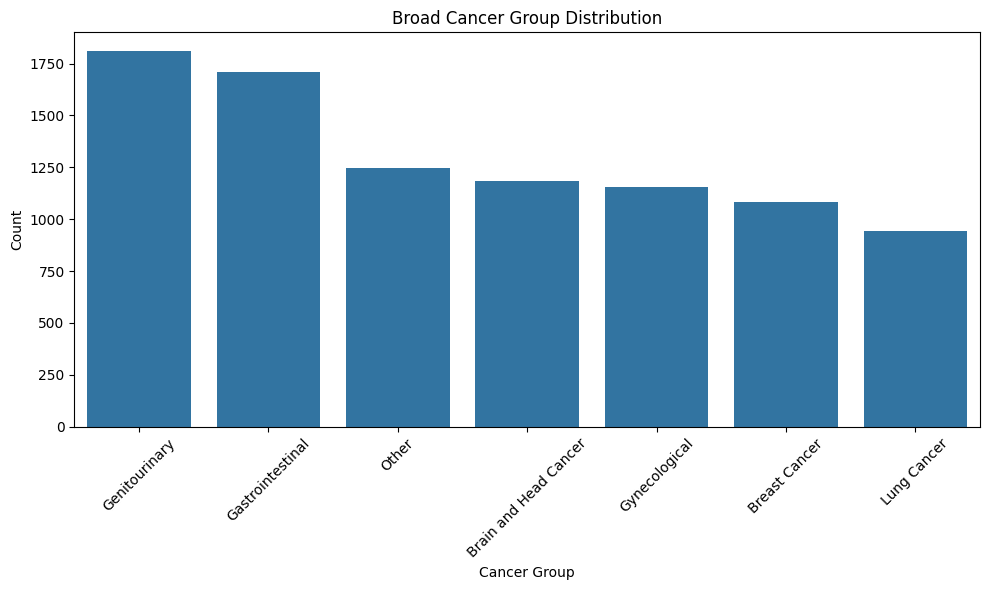

In [24]:
group_counts = df["Cancer_Group"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=group_counts.index, y=group_counts.values)
plt.xticks(rotation=45)
plt.title("Broad Cancer Group Distribution")
plt.xlabel("Cancer Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### This a reusable, standalone function named run_basic_eda(df) that performs all EDA steps starting from PCA, including:

1. Missing value handling

2. PCA visualization

3. Top variable genes bar chart

4. Correlation heatmap


In [31]:
def run_basic_eda(df, top_n_genes=20):
    """
    Basic EDA: PCA, top variable genes, correlation heatmap, and sample heatmap.
    Assumes df has 'Cancer_Type' and 'Cancer_Group'.
    """
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    from sklearn.impute import SimpleImputer
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd

    print("Basic EDA Starting...")

    # Prepare gene expression matrix
    X = df.drop(columns=["Cancer_Type", "Cancer_Group"])
    imputer = SimpleImputer(strategy="mean")
    X_imputed = imputer.fit_transform(X)
    X_scaled = StandardScaler().fit_transform(X_imputed)
    X_df = pd.DataFrame(X_imputed, columns=X.columns)

    # Top variable genes
    variances = X_df.var()
    top_genes = variances.sort_values(ascending=False).head(top_n_genes)

    # PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X_scaled)
    pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
    pca_df["Cancer_Group"] = df["Cancer_Group"].values

    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cancer_Group", palette="tab10", alpha=0.8)
    plt.title("PCA of Cancer Samples")
    plt.tight_layout()
    plt.show()

    # Bar plot of top variable genes
    plt.figure(figsize=(12, 5))
    sns.barplot(x=top_genes.index, y=top_genes.values)
    plt.xticks(rotation=90)
    plt.title(f"Top {top_n_genes} Most Variable Genes")
    plt.ylabel("Variance")
    plt.tight_layout()
    plt.show()

    # Correlation heatmap
    corr = X_df[top_genes.index].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Correlation of Top Variable Genes")
    plt.tight_layout()
    plt.show()

    # Heatmap of random samples
    heatmap_df = X_df[top_genes.index].sample(n=min(50, X_df.shape[0]), random_state=42)
    plt.figure(figsize=(14, 8))
    sns.heatmap(heatmap_df.transpose(), cmap="viridis", cbar=True)
    plt.title("Top Variable Genes Across 50 Random Samples")
    plt.xlabel("Sample Index")
    plt.ylabel("Gene")
    plt.tight_layout()
    plt.show()

    print("Basic EDA Complete.")

🔍 Basic EDA Starting...


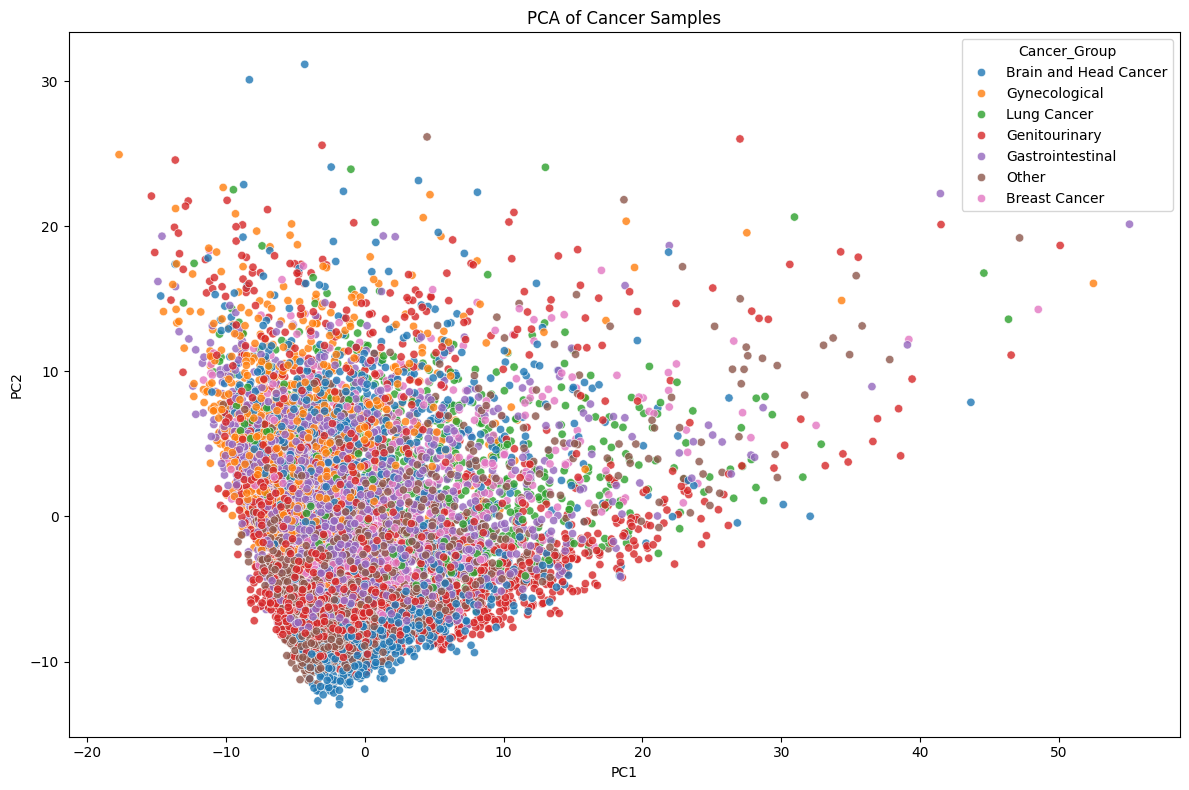

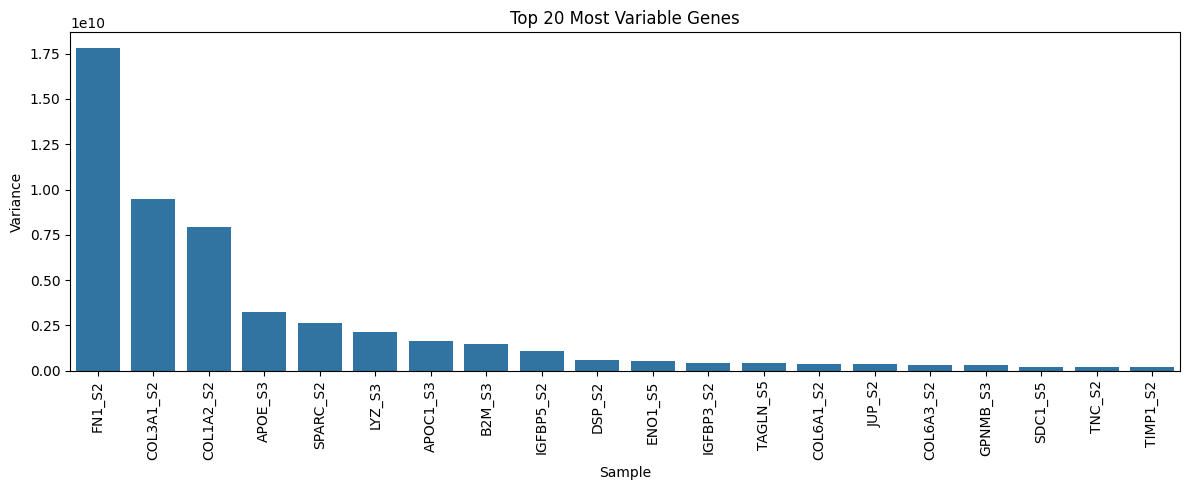

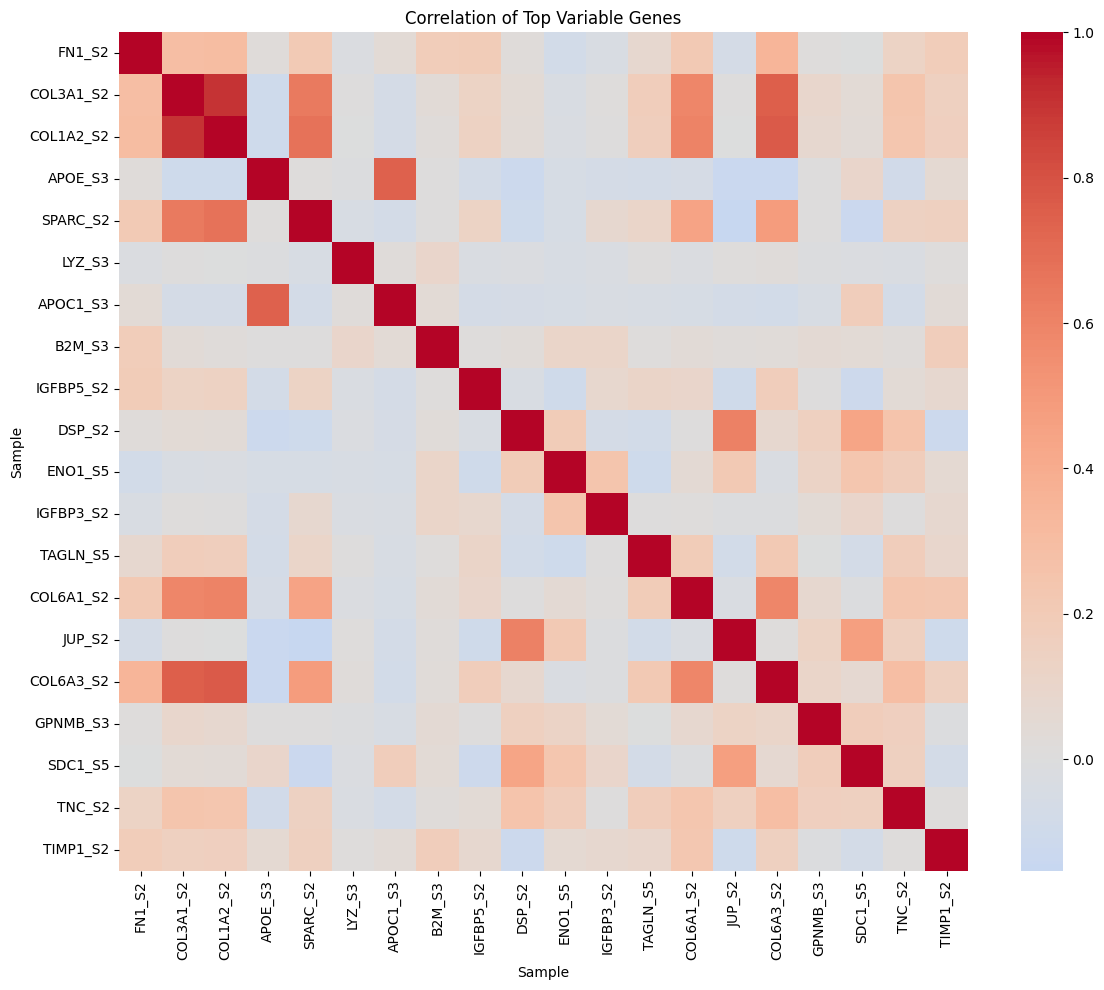

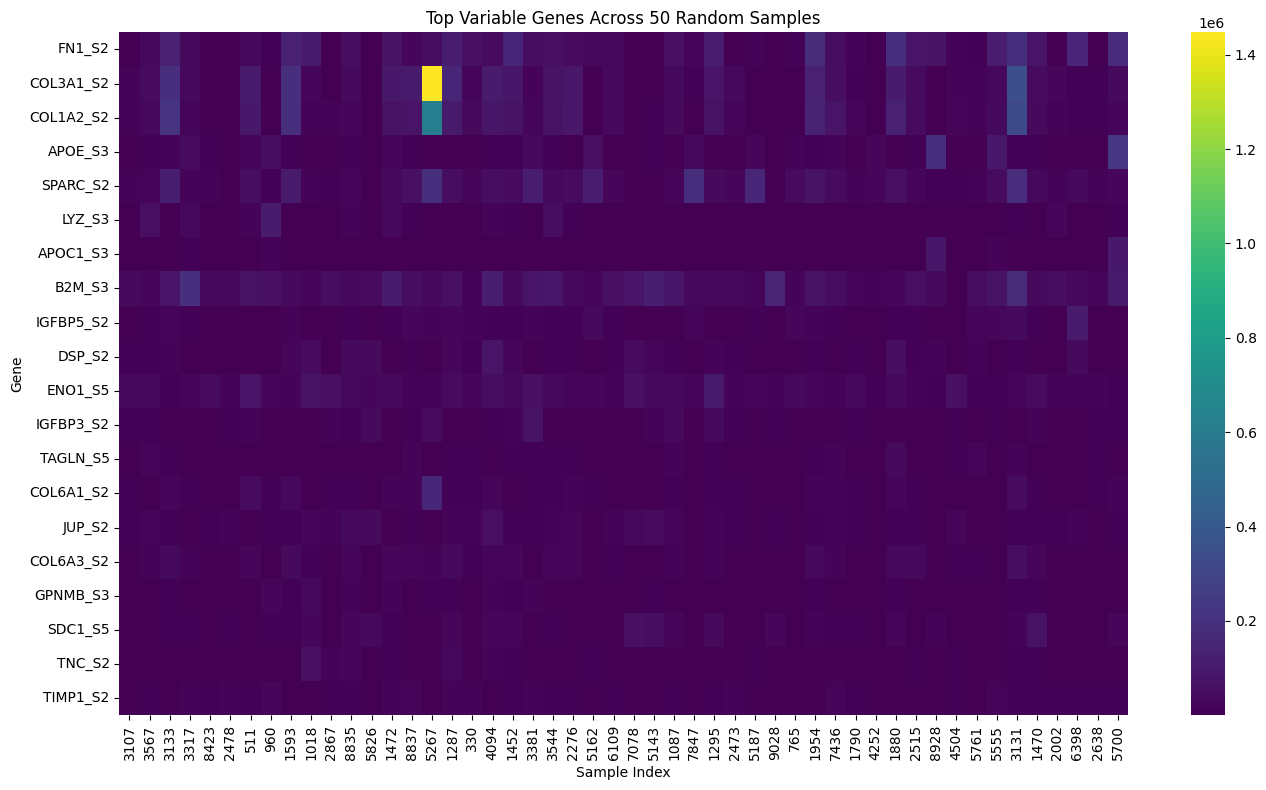

Basic EDA Complete.


In [32]:
run_basic_eda(df)

## Feature Selection

In [34]:
def select_stable_features(df, k=75):
    """
    Select stable features using 3 methods and return common features among top K in each.
    Methods: ANOVA F-score, Mutual Info, Random Forest Importance.
    """
    from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    import pandas as pd

    print("Running multi-method feature selection...")

    # Prepare data
    X = df.drop(columns=["Cancer_Type", "Cancer_Group"])
    y = df["Cancer_Group"]

    # Handle NaNs and scale
    imputer = SimpleImputer(strategy="mean")
    X_imputed = imputer.fit_transform(X)
    X_scaled = StandardScaler().fit_transform(X_imputed)

    # Store column names for reference
    feature_names = X.columns

    # --- Method 1: ANOVA F-score ---
    selector_anova = SelectKBest(score_func=f_classif, k=min(k, X.shape[1]))
    selector_anova.fit(X_scaled, y)
    top_anova = set(feature_names[selector_anova.get_support()])

    # --- Method 2: Mutual Information ---
    selector_mi = SelectKBest(score_func=mutual_info_classif, k=min(k, X.shape[1]))
    selector_mi.fit(X_scaled, y)
    top_mi = set(feature_names[selector_mi.get_support()])

    # --- Method 3: Random Forest ---
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_scaled, y)
    importances = rf.feature_importances_
    top_rf = set(pd.Series(importances, index=feature_names)
                 .sort_values(ascending=False).head(k).index)

    # --- Intersection ---
    common_features = top_anova & top_mi & top_rf
    print(f"{len(common_features)} features are common in all three methods.")

    return list(common_features)


In [35]:
top_features = select_stable_features(df, k=75)

Running multi-method feature selection...
24 features are common in all three methods.


## Training and Prediction

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_models_on_features(df, selected_features, test_size=0.2, val_size=0.2, random_state=42):
    """
    Splits data into train, validation, and test sets.
    Trains multiple classifiers and returns validation performance, trained models, encoder, and test set.
    """
    X = df[selected_features]
    y = df["Cancer_Group"]
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    class_names = le.classes_

    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y_encoded, test_size=test_size, stratify=y_encoded, random_state=random_state)
    val_relative_size = val_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=val_relative_size, stratify=y_trainval, random_state=random_state)

    print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

    models = {
      "Logistic Regression": LogisticRegression(max_iter=10000),
      "SVM": SVC(probability=True),
      "Decision Tree": DecisionTreeClassifier(),
      "Random Forest": RandomForestClassifier(),
      "XGBoost": XGBClassifier(objective="multi:softprob", eval_metric='mlogloss', verbosity=0),
      "Gradient Boosting": GradientBoostingClassifier()
      }

    results = []
    trained_models = {}
    y_val_bin = label_binarize(y_val, classes=np.unique(y_encoded))

    plt.figure(figsize=(12, 8))
    for name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[name] = model

        y_pred = model.predict(X_val)
        y_prob = model.predict_proba(X_val)

        report = classification_report(y_val, y_pred, output_dict=True, zero_division=0)
        avg_f1 = report['weighted avg']['f1-score']
        avg_precision = report['weighted avg']['precision']
        avg_recall = report['weighted avg']['recall']

        try:
            roc_auc = roc_auc_score(y_val_bin, y_prob, average="macro", multi_class="ovr")
        except ValueError:
            roc_auc = np.nan

        fpr, tpr = {}, {}
        for i in range(len(class_names)):
            fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_prob[:, i])
        all_fpr = np.unique(np.concatenate([fpr[i] for i in fpr]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(len(class_names)):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= len(class_names)

        plt.plot(all_fpr, mean_tpr, label=f"{name} (AUC = {roc_auc:.2f})")

        results.append({
            "Model": name,
            "Precision": avg_precision,
            "Recall": avg_recall,
            "F1-Score": avg_f1,
            "ROC-AUC": roc_auc
        })

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Validation ROC Curves (Macro-Average)")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

    return results_df, trained_models, le, X_test, y_test


In [48]:
def predict_on_test_set(model, X_test, y_test, class_names):
    """
    Evaluates the best model on test data with classification report, confusion matrix, and ROC plot.
    """
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
    from sklearn.preprocessing import label_binarize
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import pandas as pd

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    y_test_bin = label_binarize(y_test, classes=np.arange(len(class_names)))

    report = classification_report(y_test, y_pred, target_names=class_names, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print("Classification Report")
    print(report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Test Confusion Matrix")
    plt.tight_layout()
    plt.show()

    try:
        auc_score = roc_auc_score(y_test_bin, y_prob, average="macro", multi_class="ovr")
        fpr, tpr = {}, {}
        for i in range(len(class_names)):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        all_fpr = np.unique(np.concatenate([fpr[i] for i in fpr]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(len(class_names)):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= len(class_names)

        plt.figure(figsize=(8, 6))
        plt.plot(all_fpr, mean_tpr, label=f"AUC = {auc_score:.2f}")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve (Macro-Average)")
        plt.legend()
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"ROC-AUC not available: {e}")

Train shape: (5475, 24), Validation shape: (1825, 24), Test shape: (1826, 24)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


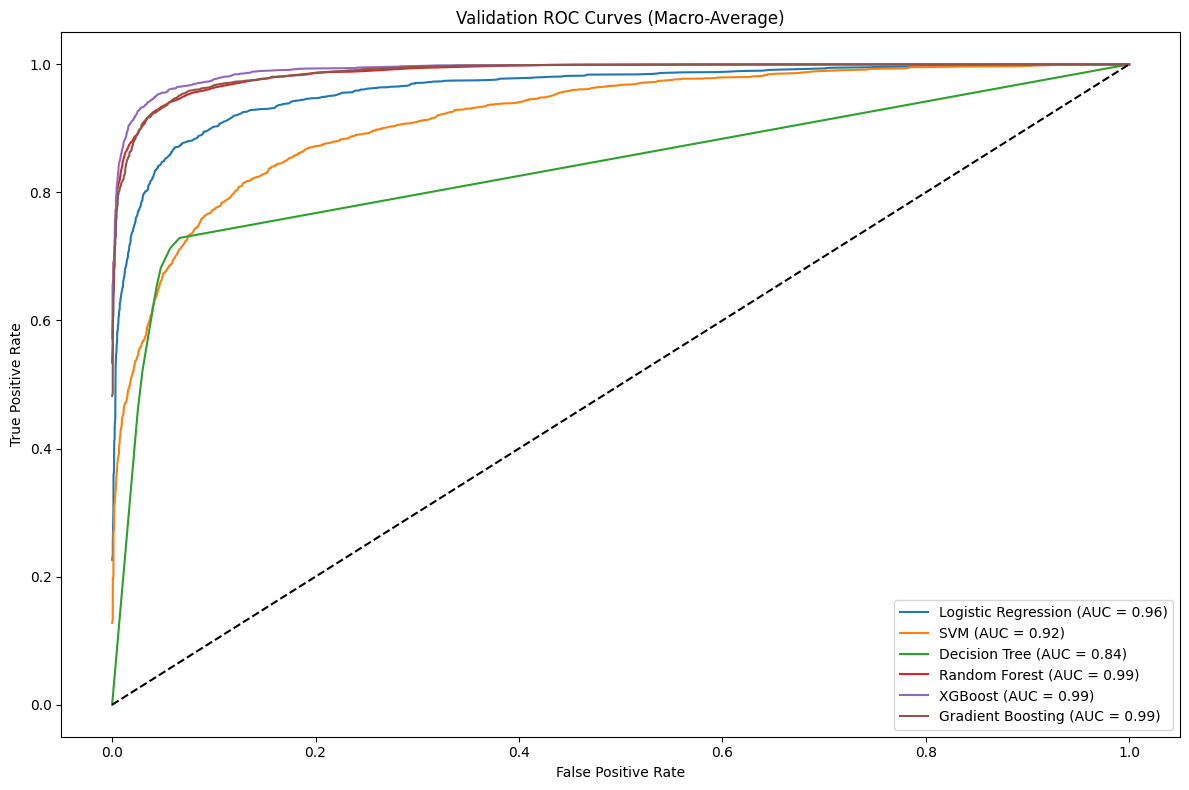

Best model: XGBoost
Classification Report
                       precision    recall  f1-score   support

Brain and Head Cancer       0.93      0.92      0.93       236
        Breast Cancer       0.95      0.89      0.92       217
     Gastrointestinal       0.95      0.93      0.94       342
        Genitourinary       0.92      0.93      0.92       362
        Gynecological       0.82      0.88      0.85       231
          Lung Cancer       0.81      0.79      0.80       189
                Other       0.95      0.97      0.96       249

             accuracy                           0.91      1826
            macro avg       0.90      0.90      0.90      1826
         weighted avg       0.91      0.91      0.91      1826



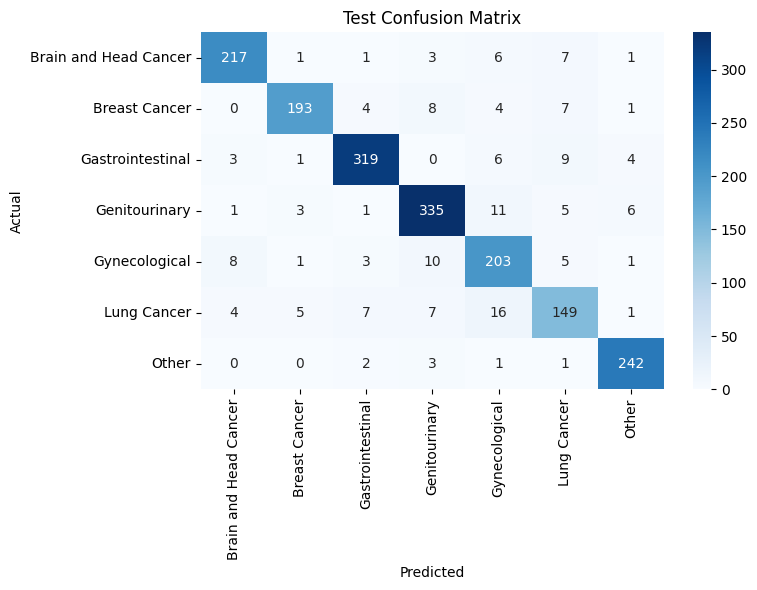

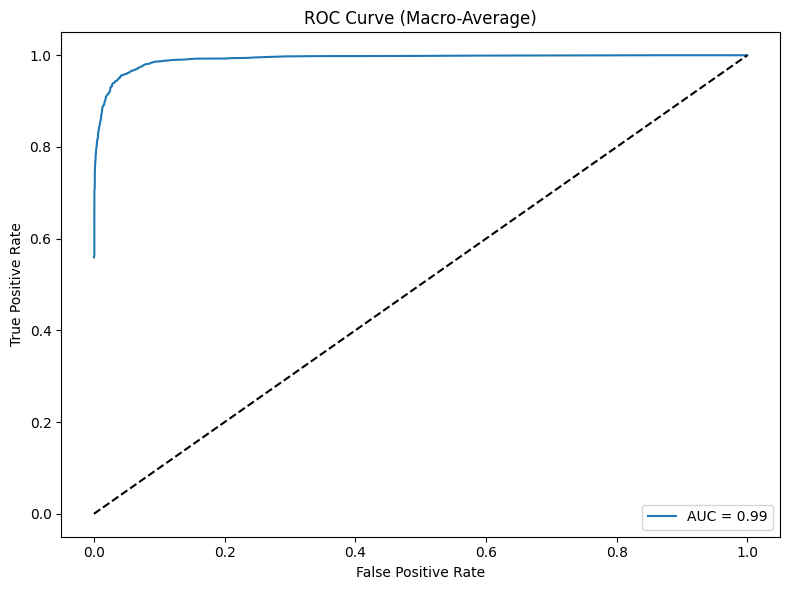

In [49]:
# Step 1: Train + evaluate
results_df, models_dict, le, X_test, y_test = evaluate_models_on_features(df, selected_features=top_features)

# Step 2: Get best model by F1-score
best_model_name = results_df.iloc[0]['Model']
best_model = models_dict[best_model_name]
print(f"Best model: {best_model_name}")

# Step 3: Predict on test set
predict_on_test_set(best_model, X_test, y_test, le.classes_)


## Conclusion
This notebook demonstrates a complete machine learning pipeline for multiclass cancer type classification using gene expression data. The approach integrates exploratory data analysis, stable feature selection, model training, and test evaluation, making it both reproducible and adaptable for biomedical research.

### Key Outcomes:
Exploratory Data Analysis (EDA) revealed structure and variance within the gene expression data.

Feature Selection used a robust ensemble of three methods—ANOVA F-score, Mutual Information, and Random Forest—to select consistently informative genes.

Six machine learning models were trained and evaluated on a 60/20/20 split, covering logistic regression to advanced ensemble techniques like XGBoost.

Macro-average ROC curves and evaluation metrics were used to fairly assess performance across all cancer types.

The best model in our case is XGBoost (by validation F1-score) was applied to an independent test set for final evaluation. The overall accuracy for the independent test set is 91% with AUC of 0.99